In [4]:
import json
from matplotlib import pyplot as plt
import numpy as np
import os

[ 16  32   4   4 256 512   1  32   8   4  64  16  32  64  16  16  32 256
   8   1  16 256   2   2 512   4 128 256  64   4   1   8   1   2   4 256
   8  32  64  16   8  16  32   8 128 128  32   1 128 256   2 256 512   1
 128 512 128  32   2 512 128  64 128 256  16  64 512 512  64   2   8 512
   8 128   1   4   4   4  16   2  64 256   8 512   2   1  32 256  16  64
 128   1   8   2   4 512   2  64  32   1] [0.63749999 0.63749999 0.73750001 0.60416669 0.60833335 0.25
 0.63749999 0.63333333 0.63749999 0.63749999 0.63749999 0.25
 0.56666666 0.25416666 0.60416669 0.63333333 0.25       0.63749999
 0.25416666 0.60416669 0.60833335 0.25416666 0.25       0.63749999
 0.56666666 0.60833335 0.60416669 0.25       0.63749999 0.56666666
 0.63749999 0.60833335 0.73750001 0.60416669 0.63333333 0.25
 0.56666666 0.60416669 0.63333333 0.73750001 0.63333333 0.25
 0.25       0.63749999 0.25416666 0.25       0.60833335 0.25
 0.73750001 0.63333333 0.63333333 0.63749999 0.25416666 0.60833335
 0.56666666 0.604166

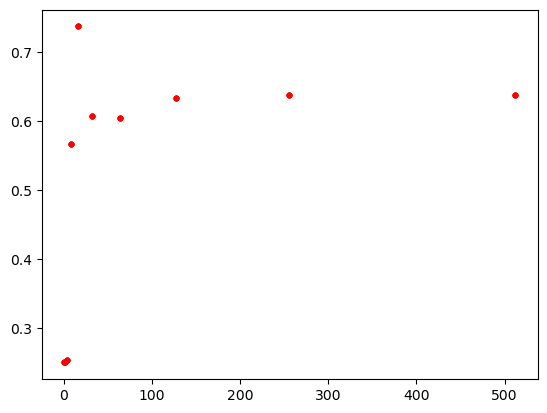

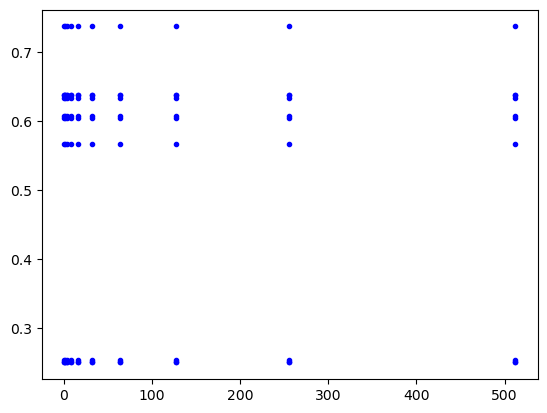

In [18]:
def getConfig(filedir, exp):
    dir_name = 'Experiment_Data_%s/%d/'%(filedir, exp)
    filename = dir_name + 'config.json'
    with open(filename) as json_file:
        return json.load(json_file)

def loadData(filedir='CIFAR'):
    def getAccuracy(filedir):
        filename = filedir + 'metrics.json'
        with open(filename) as json_file:
            data = json.load(json_file)
        acc = data['val_accuracy']['values']
        loss = data['val_loss']['values']
        return acc, loss
        
        
    def getConfig(filedir):
        filename = filedir + 'config.json'
        with open(filename) as json_file:
            return json.load(json_file)
        
    val_acc = []
    val_loss = []
    prec = []
    shots = []
    
    dir_name = 'Experiment_Test_%s'%filedir
    
    dirs = os.listdir(dir_name)
    dirs.remove('_sources')
    for directory in dirs:
        filedir = dir_name + '/' + directory + '/'
        acc, loss = getAccuracy(filedir)
        val_acc.append(acc[0])
        val_loss.append(loss[0])
        config = getConfig(filedir)
        prec.append(config['precision'])
        shots.append(config['shots'])
    return np.array(val_acc), np.array(val_loss), np.array(prec), np.array(shots)

acc, loss, prec, shots = loadData()
print(shots, acc)
plt.plot(prec, acc, 'r.')
plt.show()
plt.plot(shots, acc, 'b.')